In [88]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt 

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [4]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
base = automap_base()

In [6]:
base.prepare(engine, reflect=True)

In [7]:
base.classes.keys()

['measurement', 'station']

In [8]:
Measurement = base.classes.measurement
Station = base.classes.station

In [9]:
session = Session(engine)

In [10]:
#I want to read using pd 
conn = engine.connect()
data_1 = pd.read_sql("SELECT * FROM Measurement", conn)
data_1.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
#convert date column as 'date' datatype
data_1['date'] = pd.to_datetime(data_1['date'])

# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
recent_date = data_1['date'].max()
old_date = recent_date - pd.Timedelta(days=365) 
old_date, recent_date

(Timestamp('2016-08-23 00:00:00'), Timestamp('2017-08-23 00:00:00'))

In [12]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
data1_update = data_1.loc[(data_1['date']<=recent_date) & (data_1['date']>=old_date)]
data1_update.index = data1_update['date']

# Sort the dataframe by date
data1_update = data1_update.sort_index()


Text(0,0.5,'precipitation')

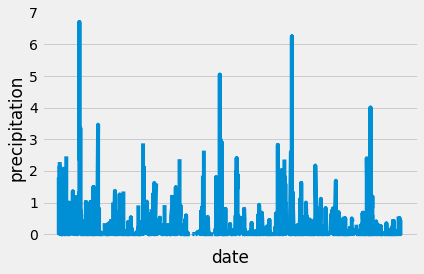

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(data1_update['date'], data1_update['prcp'])
#plt.xticks(rotation='vertical')
plt.xticks([])
plt.xlabel('date')
plt.ylabel('precipitation')

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data 
summary = data1_update['prcp'].describe()
summary

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

In [15]:
#Station Analysis
#Design a query to show how many stations are available in this dataset?
station_num = data_1['station'].nunique()
station_num

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_group = data_1.groupby('station')
station_count = station_group['station'].count().sort_values(ascending=False)
station_count

station
USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
min_temp = data_1.loc[data_1['station'] == 'USC00519281', 'tobs'].min()
max_temp = data_1.loc[data_1['station'] == 'USC00519281', 'tobs'].max()
ave_temp = data_1.loc[data_1['station'] == 'USC00519281', 'tobs'].mean()
min_temp, max_temp, ave_temp

(54.0, 85.0, 71.66378066378067)

In [18]:
# Choose the station with the highest number of temperature observations.
station_one = data_1.loc[data_1['station'] == 'USC00519281']
station_one.head()

,id,station,date,prcp,tobs
12187,12188,USC00519281,2010-01-01,0.15,70.0
12188,12189,USC00519281,2010-01-02,0.00,62.0
12189,12190,USC00519281,2010-01-03,0.00,74.0
12190,12191,USC00519281,2010-01-04,0.00,75.0
12191,12192,USC00519281,2010-01-05,0.00,74.0


In [19]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_one['date'] = pd.to_datetime(station_one['date'])
end_date = station_one['date'].max()
start_date = end_date - pd.Timedelta(days=365) 
start_date, end_date

/Users/chrisboeckner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(Timestamp('2016-08-18 00:00:00'), Timestamp('2017-08-18 00:00:00'))

In [20]:
station_update = station_one.loc[(station_one['date']<=end_date) & (station_one['date']>=start_date)]
station_update.index = station_update['date']
station_update = data1_update.sort_index()

Text(0,0.5,'Frequency')

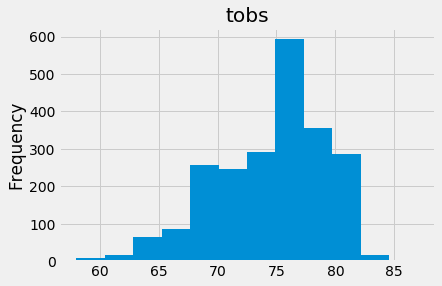

In [58]:
#Query the last 12 months of temperature observation data for this station and plot the results as a histogram 12 BINS
station_update.hist(column='tobs', bins=12)
plt.ylabel('Frequency')

In [48]:
tob_freq = station_update['tobs'].value_counts()
tob_freq = pd.DataFrame(tob_freq)
tob_freq.head()

,tobs
77.0,212
76.0,210
78.0,198
74.0,174
75.0,171


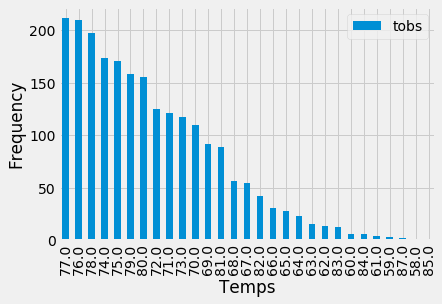

In [53]:
#FREQUENCY WITHIN THE LAST YEAR FOR EACH TEMPERATURE
tob_freq.plot.bar()
plt.xlabel('Temps')
plt.ylabel('Frequency')
plt.show()